# Google store data
## Intro
This anlysis used the dataset resources from Kaggle [Database of Android Apps](https://www.kaggle.com/orgesleka/android-apps) , [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) and [Mobile App Store ( 7200 apps)](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).

I also used the analysis method from [All that you need to know about the Android market](https://www.kaggle.com/lava18/all-that-you-need-to-know-about-the-android-market) and [How to get "High" Rating on Play Store](https://www.kaggle.com/tanetboss/how-to-get-high-rating-on-play-store).

I will use these three datasets to understand how rating is affacted in Google Play market (and iOS app store)

gd represents Dataset from [Database of Android Apps](https://www.kaggle.com/orgesleka/android-apps)

df represents Dataset from [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps)

ad represents Dataset from [Mobile App Store ( 7200 apps)](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)


In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette('colorblind')
sns.set(rc={'figure.figsize':(25,15)})
plt.style.use('ggplot')

#import plotly
#plotly.offline.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [48]:
gd = pd.read_csv('https://tufts.box.com/shared/static/8utsdmfx97s0o1j63l1ogwr3822coo6l.csv')
df = pd.read_csv('https://tufts.box.com/shared/static/alsoyenvkbs5kuuyjkpjslk8x6iou6up.csv')
ad = pd.read_csv('https://tufts.box.com/shared/static/apy20t1jghwu4vxho9p3mar23vmgfw67.csv')


I inputed two different datasets on Google Play app and one dataset on iOS app store

In [49]:
#print(gd.dtypes)
gd.drop_duplicates(subset='App', inplace=True)
gd = gd[gd['Android Ver'] !=np.nan]
gd = gd[gd['Android Ver'] !='NAN']
gd = gd[gd['Installs'] != 'Free']
gd = gd[gd['Installs'] != 'Paid']
df = df[df['fileSize'] != '']

In [50]:
print('Number of apps in the first dataset : ' , len(gd))
gd.sample(7)

Number of apps in the first dataset :  9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6289,happn – Local dating app,LIFESTYLE,4.3,1118201,Varies with device,"10,000,000+",Free,0,Mature 17+,Lifestyle,"July 24, 2018",Varies with device,Varies with device
6783,Wifi BT Scanner,FAMILY,5.0,2,1.2M,500+,Free,0,Everyone,Education,"November 3, 2016",1.0,4.0.3 and up
4768,X-WOLF,GAME,4.2,4878,27M,"100,000+",Free,0,Everyone 10+,Adventure,"February 2, 2018",1.2.0,4.1 and up
10682,Fruit Ninja Classic,GAME,4.3,85468,36M,"1,000,000+",Paid,$0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up
9919,TattooSupplies.eu,SHOPPING,NaN,31,34M,"1,000+",Free,0,Everyone,Shopping,"August 9, 2017",1.3.1,4.1 and up
10726,Thumbnail Maker,PHOTOGRAPHY,4.4,26252,24M,"1,000,000+",Free,0,Everyone,Photography,"May 26, 2018",1.7,4.2 and up
5676,news.com.au,NEWS_AND_MAGAZINES,NaN,1,3.7M,100+,Free,0,Everyone,News & Magazines,"July 23, 2018",1.1,4.0 and up


In [51]:
print('Number of apps in the second dataset : ' , len(df))
df.sample(7)

Number of apps in the second dataset :  9264


,name,datePublished,numDownloadsMin,fileSize,packageName,price,aggregateRating,softwareVersion,ratingCount,dateCrawled,url
1334,Math Pack Flash Cards (PRO),23. Januar 2014,100,741k,nate.math.mathpackpro,0.73,4.333333,1.3,6,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
4545,Sevimli Pokemonlar,17. September 2014,500,104k,baran.sevimlipokemonlar,0.00,3.888889,1,18,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
6641,Fate of the Pharaoh,19. Juni 2014,100000,178M,com.g5e.fatepharaoh.android,0.00,4.225037,1.1.0,4697,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
2647,HTC Sense TV,30. September 2014,5000000,NaN,com.htc.videohub.ui,0.00,4.398797,NaN,6482,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
3639,Gayatri Mantra with Audio,30. Juni 2014,10000,1.6M,com.gayatrimantracafeinks,0.00,4.500000,1.9,152,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
4136,Math 24,18. Februar 2013,50,1.1M,com.twabs.points24,0.00,0.000000,1.2.0,0,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
201,HEAT,13. April 2012,1000,2.4M,SandyBell.puzzle.HEAT,0.00,4.750000,0.0.0.1,4,10/5/14 0:00,https://play.google.com/store/apps/details?id=...


In [52]:
ad.sample(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
4256,5336,1033645055,Smart Watch Notice,1547264,USD,4.99,214,3,1.0,1.0,1.1.0,4+,Utilities,38,1,1,1
7157,10969,1181283568,机で卓球,172687360,USD,0.00,0,0,0.0,0.0,1.0.9,4+,Games,40,5,2,1
2004,2332,653508448,"Monster Legends RPG - War, Fight & Heroes Game",170844160,USD,0.00,111579,365,4.5,5.0,5.2.3,9+,Games,38,5,12,1
1546,1791,561632513,Peatix -Discover events & communities in your ...,84125696,USD,0.00,10,0,3.0,0.0,2.10.0,4+,Entertainment,37,0,2,1
318,357,353372460,Learn to Speak Spanish Fast With MosaLingua,48819200,USD,4.99,9,1,5.0,5.0,9.2,12+,Education,38,5,5,1


In [53]:
ad = ad[ad['user_rating'] !=0]
ad = ad[ad['user_rating'] !=0.0]
ad = ad[ad['user_rating'] !='NaN']
ad = ad[ad['user_rating'] !=np.nan]
print('Number of apps in the third dataset : ' , len(ad))
ad.sample(7)

Number of apps in the third dataset :  6268


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
2237,2608,721911537,The Occupant,80564224,USD,0.99,155,151,4.5,4.5,1.1,9+,Games,39,4,1,1
813,925,436672029,AliExpress Shopping App,133053440,USD,0.00,10647,185,4.0,4.5,5.2.7,12+,Shopping,37,0,18,1
617,703,405548206,Lobi,38540288,USD,0.00,36,0,4.0,0.0,9.1.5,17+,Social Networking,37,0,4,1
1887,2193,627986929,OPM Alert,30252032,USD,0.00,172,4,2.0,3.0,2.0.5,4+,News,37,5,1,1
404,460,370144476,Math Ninja HD,25137152,USD,1.99,1121,209,4.5,4.5,1.7,9+,Games,43,5,1,1
5411,7252,1082958340,Justmoji,11343872,USD,1.99,914,64,5.0,4.0,1.0.3,9+,Entertainment,37,5,1,1
6141,8715,1115022026,The Secret To Money,25714688,USD,4.99,715,118,4.5,4.5,1.1.4,4+,Lifestyle,37,5,1,1


## Data Cleaning
###  First dataset(gd)
1. Convert all size to MB (KB devided by 10^3) and remove "M" and "K" to make it an number
2. Remove "+" of installs and make it int
3. Remove "$" of Price and make it float
4. Change Type "Paid" and "Free" to bool "True" and "False"
5. Change "Reviews" to int

In [54]:
gd['Installs'] = gd['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
gd['Installs'] = gd['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)
# gd['Installs'] = gd['Installs'].str.replace('+','')
gd['Installs'] = gd['Installs'].apply(lambda x: int(x))
# gd['Installs'] = pd.to_numeric(gd['Installs']) should be faster

Using Excel "Filter" I found out apart from exact size, there is "Varies with device". We need to change it to NaN to change the whole column into number

In [55]:
gd['Size'] = gd['Size'].apply(lambda x: str(x).replace('Varies with device','NaN' ) if 'Varies with device' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: str(x).replace('M','' ) if 'M' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: str(x).replace(',','' ) if 'M' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: float(x))
gd.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [56]:
gd['Price'] = gd['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else x)
gd['Price'] = gd['Price'].apply(lambda x: float(x))
gd.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [57]:
# gd['Type'] = gd['Type'].apply(lambda x: str(x).replace('Free','0') if 'Free' in str(x) else x)
# gd['Type'] = gd['Type'].apply(lambda x: str(x).replace('Paid','1') if 'Paid' in str(x) else x)
# gd['Type'] = gd['Type'].apply(lambda x: bool(x))
# gd.dtypes
# pd.get_dummies(gd['Type'])

In [58]:
# suggestion
# gd['Type'].unique()
# gd.join(pd.get_dummies(gd['Type']))

In [59]:
gd['Reviews'] = gd['Reviews'].apply(lambda x: int(x))

### Second dataset(df)

In [60]:
df.dtypes

name                object
datePublished       object
numDownloadsMin      int64
fileSize            object
packageName         object
price              float64
aggregateRating    float64
softwareVersion     object
ratingCount          int64
dateCrawled         object
url                 object
dtype: object

From the type above, I need to change the type of "fileSize" to float. In order to comply with the other dataset, I will convert the Gb, Kb to Mb, and get ride of M.

In [61]:
df['fileSize'] = df['fileSize'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['fileSize'] = df['fileSize'].apply(lambda x: float(str(x).replace('G', '')) * 1000 if 'k' in str(x) else x)
df['fileSize'] = df['fileSize'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)

### Third dataset(ad)

In [62]:
ad.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

On the type of the variables, there is nothing need to be cleaned. But I'd like to change size_bytes to MB in order to align with other dataset

In [63]:
ad['size_bytes'] = ad['size_bytes'].apply(lambda x: float(x) / 1000000)
ad.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100.788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158.578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92.774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


I want to add indentifor like "iOS" in the column to classify them

In [64]:
ad = ad.assign(platform = 'iOS')
ad.sample(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,platform
5561,7497,1088041538,Phantasmat: The Dread of Oakville - A Mystery ...,1021.167616,USD,6.99,71,71,4.5,4.5,1.0.0,9+,Games,38,5,4,1,iOS
1995,2321,652039347,"Princess Salon™ - Girls Makeup, Dressup and Ma...",53.260288,USD,0.00,5030,1014,4.0,4.0,1.2,4+,Games,43,5,1,1,iOS
500,570,387893495,Virtual Regatta Offshore,123.541504,USD,0.00,209,1,3.5,5.0,2.2.1,4+,Games,37,5,1,1,iOS
6441,9361,1129690785,Arthur's Adventures-Road of Glory:Pocket Edition,140.864512,USD,0.99,18,1,5.0,3.0,1.1.2,9+,Games,38,0,2,1,iOS
3180,3820,940596201,Tap Titans,393.954304,USD,0.00,87898,8763,4.5,5.0,4.0.0,4+,Games,43,5,18,1,iOS


It works! Now I will do the same for the other datasets as well

In [65]:
gd = gd.assign(platform='Android')
df = df.assign(platform='Android')

## Merging datasets

First, I will try to merge ad and pd using the app name. But becuase they don't have the same column name(one is "App" and another one is track_name), I need to change them to the same first)

In [66]:
ad.rename(columns={'track_name':'App'}, inplace=True)
ad.head()

,Unnamed: 0,id,App,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,platform
0,1,281656475,PAC-MAN Premium,100.788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,iOS
1,2,281796108,Evernote - stay organized,158.578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,iOS
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100.524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,iOS
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128.512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,iOS
4,5,282935706,Bible,92.774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,iOS


Now, the column of App name is the same now, we can start to merge them

In [67]:
md = pd.merge(gd, ad, on='App', how='inner')
print('Number of apps in the joint dataset : ' , len(md))

Number of apps in the joint dataset :  328


In [68]:
md.dtypes

App                  object
Category             object
Rating              float64
Reviews               int64
Size                float64
Installs              int64
Type                 object
Price               float64
Content Rating       object
Genres               object
Last Updated         object
Current Ver          object
Android Ver          object
platform_x           object
Unnamed: 0            int64
id                    int64
size_bytes          float64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
platform_y           object
dtype: object

Looks like we got Lucky! There are 328 apps in both datasets. I will save it for further analysis

Second, I will try to merge gd and df using app name. Because of the same problem, we will change the name first.

In [69]:
df.rename(columns={'name':'App'}, inplace=True)

In [70]:
md2 = pd.merge(gd, df, on='App', how='inner')
print('Number of apps in the joint dataset : ' , len(md2))
md2.head()

Number of apps in the joint dataset :  173


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,numDownloadsMin,fileSize,packageName,price,aggregateRating,softwareVersion,ratingCount,dateCrawled,url,platform_y
0,Cool Reader,BOOKS_AND_REFERENCE,4.5,246315,NaN,10000000,Free,0.0,Everyone,Books & Reference,...,10000000,6.6,org.coolreader,0.0,4.577154,NaN,147213,10/5/14 0:00,https://play.google.com/store/apps/details?id=...,Android
1,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference,...,500000000,NaN,com.google.android.apps.books,0.0,3.824167,NaN,619379,10/5/14 0:00,https://play.google.com/store/apps/details?id=...,Android
2,Moon+ Reader,BOOKS_AND_REFERENCE,4.4,233757,NaN,10000000,Free,0.0,Everyone,Books & Reference,...,10000000,7.4,com.flyersoft.moonreader,0.0,4.461517,2.6.5,160785,10/5/14 0:00,https://play.google.com/store/apps/details?id=...,Android
3,DC Comics,COMICS,4.2,25671,NaN,1000000,Free,0.0,Teen,Comics,...,1000000,9.2,com.dccomics.comics,0.0,4.150023,3.6.3.3630,10585,10/5/14 0:00,https://play.google.com/store/apps/details?id=...,Android
4,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,...,500000000,NaN,com.whatsapp,0.0,4.442019,NaN,18664636,10/5/14 0:00,https://play.google.com/store/apps/details?id=...,Android


Let's mess around a little bit by adding two dataset through outer method to save all the data we want


In [71]:
gd1=pd.DataFrame(data = (gd.App, gd.Category, gd.Price, gd.Rating, gd.platform)).T

gd1.head()

,App,Category,Price,Rating,platform
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,0,4.1,Android
1,Coloring book moana,ART_AND_DESIGN,0,3.9,Android
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,0,4.7,Android
3,Sketch - Draw & Paint,ART_AND_DESIGN,0,4.5,Android
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,0,4.3,Android


Let's do the same thing for the app store one and unified the name

In [72]:
ad1=pd.DataFrame(data=(ad.App, ad.prime_genre, ad.price, ad.user_rating, ad.platform)).T
ad1.sample(5)

,App,prime_genre,price,user_rating,platform
6777,Tongo Music - for kids and families,Education,1.99,4,iOS
6585,Paddle Panic,Games,0,4,iOS
1584,Bubble Guppies: Animal School Day,Education,2.99,4,iOS
5308,Custom Cam,Photo & Video,1.99,1.5,iOS
1545,T-Mobile,Productivity,0,4,iOS


In [73]:
ad1.rename(columns={'prime_genre':'Category', 'price':'Price', 'user_rating':'Rating'}, inplace=True)
ad1.sample(5)

,App,Category,Price,Rating,platform
3389,Flight Pilot Simulator 3D: Flying Game For Free,Games,0,5,iOS
6113,Lucky Block Mod for Minecraft PC Edition - Poc...,Games,1.99,2,iOS
4750,My Town : Daycare,Entertainment,2.99,4.5,iOS
3694,Hot Shot Slots Games – Vegas Casino Slot Machines,Games,0,4.5,iOS
811,Junk Jack Retro,Games,2.99,4.5,iOS


In [74]:
md3=pd.merge(gd1, ad1, how='outer')
md3.sample(10)

,App,Category,Price,Rating,platform
3050,Yandex.Transport,MAPS_AND_NAVIGATION,0.00,4.0,Android
2635,Funny Alarm Clock Ringtones,PERSONALIZATION,0.00,4.5,Android
6892,Resume Builder and CV maker app,PRODUCTIVITY,0.00,4.3,Android
8824,EvAk Smart Home,LIFESTYLE,0.00,NaN,Android
3424,Magic Tiles - Blackpink Edition (K-Pop),GAME,0.00,4.6,Android
12287,Awesome Voice Recorder Pro - Mp3 Audio Recording,Business,4.99,4.5,iOS
13520,Bits of Sweets,Games,0.00,4.5,iOS
13898,Babysitter Madness - Help the Nanny,Games,0.00,3.5,iOS
3141,B,FINANCE,0.00,3.7,Android
3296,Offroad G-Class 2018,FAMILY,0.00,4.4,Android


In [75]:
md3.dtypes

App          object
Category     object
Price       float64
Rating      float64
platform     object
dtype: object

## Basic EDA

In [76]:
# df_plot = gd[['Rating', 'Size', 'Installs', 'Reviews', 'Type', 'Price']]
# df_plot['Installs'] = np.log(df_plot['Installs'])
# df_plot['Reviews'] = pd.to_numeric(df_plot['Reviews'])
# df_plot['Reviews'] = df_plot['Reviews'].loc[df_plot['Reviews'] != 0].dropna()
# df_plot['Reviews'] = np.log10(df_plot['Reviews'])
# df_plot.head()
# sns.pairplot(data=df_plot, hue='Type')

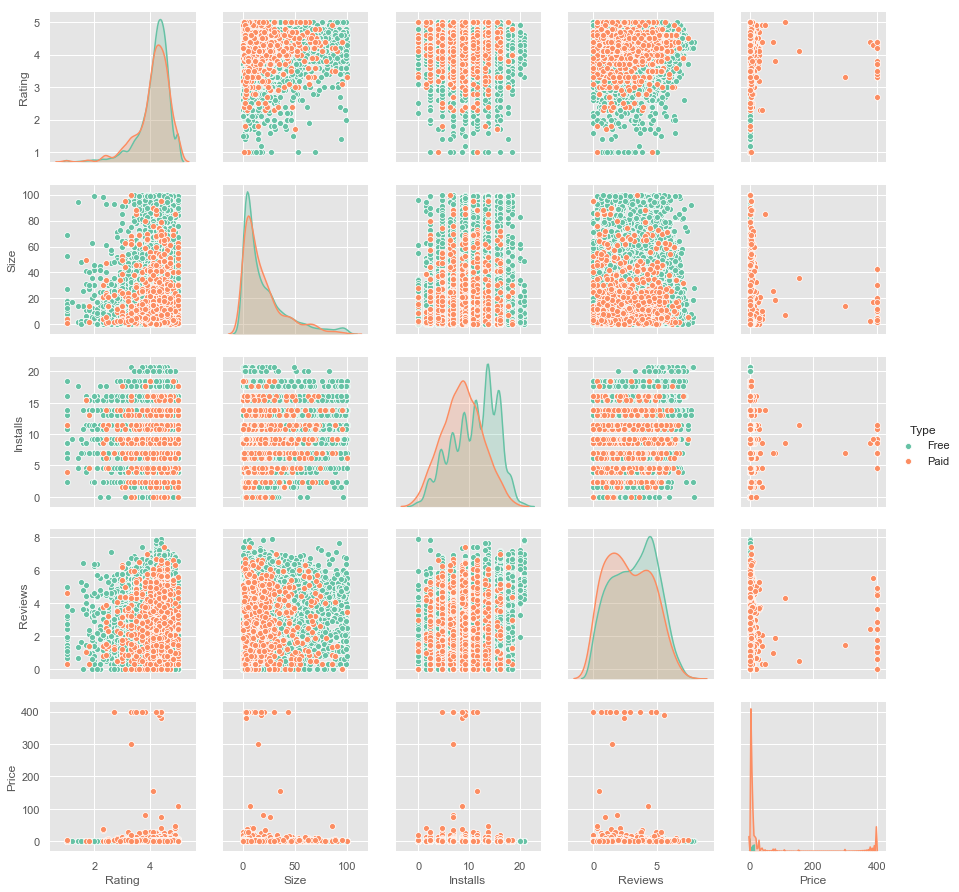

In [77]:
x = gd['Rating'].dropna()
y = gd['Size'].dropna()
z = gd['Installs'][gd.Installs!=0].dropna()
p = gd['Reviews'][gd.Reviews!=0].dropna()
t = gd['Type'].dropna()
price = gd['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)),
                              columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']),
                                 hue='Type', palette="Set2")

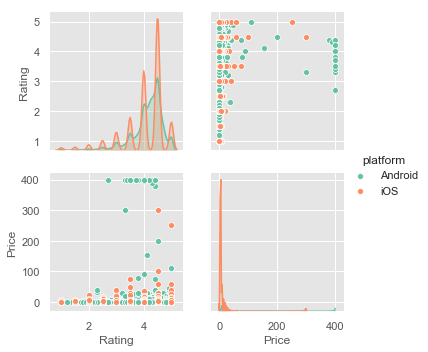

In [78]:
x = md3['Rating'].dropna()
price = md3['Price']
p= md3['platform'].dropna()

p = sns.pairplot(pd.DataFrame(list(zip(x, p, price)),
                              columns=['Rating','platform','Price']),
                              hue='platform', palette="Set2" )

This is the basic exploratory analysis to look for any evident patterns or relationships between the features. 

## More analysis
Then, I want to know the ratio of different categories. 

([<matplotlib.patches.Wedge at 0x1a1e8b0f60>,
 [Text(4.399346269001779, 0.0758446136527323, 'BEAUTY'),
  Text(4.393893566488253, 0.23173115106334394, 'COMICS'),
  Text(4.3820257089650045, 0.3973042737874219, 'PARENTING'),
  Text(4.362442956642998, 0.5736649283648955, 'ART_AND_DESIGN'),
  Text(4.3347870094434, 0.7547327889794817, 'EVENTS'),
  Text(4.2965568018200475, 0.9484722709356819, 'HOUSE_AND_HOME'),
  Text(4.2440583041269955, 1.1610207195268727, 'WEATHER'),
  Text(4.176571754131303, 1.3842862357881673, 'LIBRARIES_AND_DEMO'),
  Text(4.094211620241745, 1.6116548044409107, 'AUTO_AND_VEHICLES'),
  Text(3.988677783105802, 1.8575385709476366, 'ENTERTAINMENT'),
  Text(3.849832866678743, 2.130442887908553, 'FOOD_AND_DRINK'),
  Text(3.679056310576478, 2.4134093443938176, 'EDUCATION'),
  Text(3.470876181532702, 2.704259331585818, 'MAPS_AND_NAVIGATION'),
  Text(3.1968225674387876, 3.0232971194234417, 'VIDEO_PLAYERS'),
  Text(2.8501918023886925, 3.3520749826930034, 'DATING'),
  Text(2.4235713

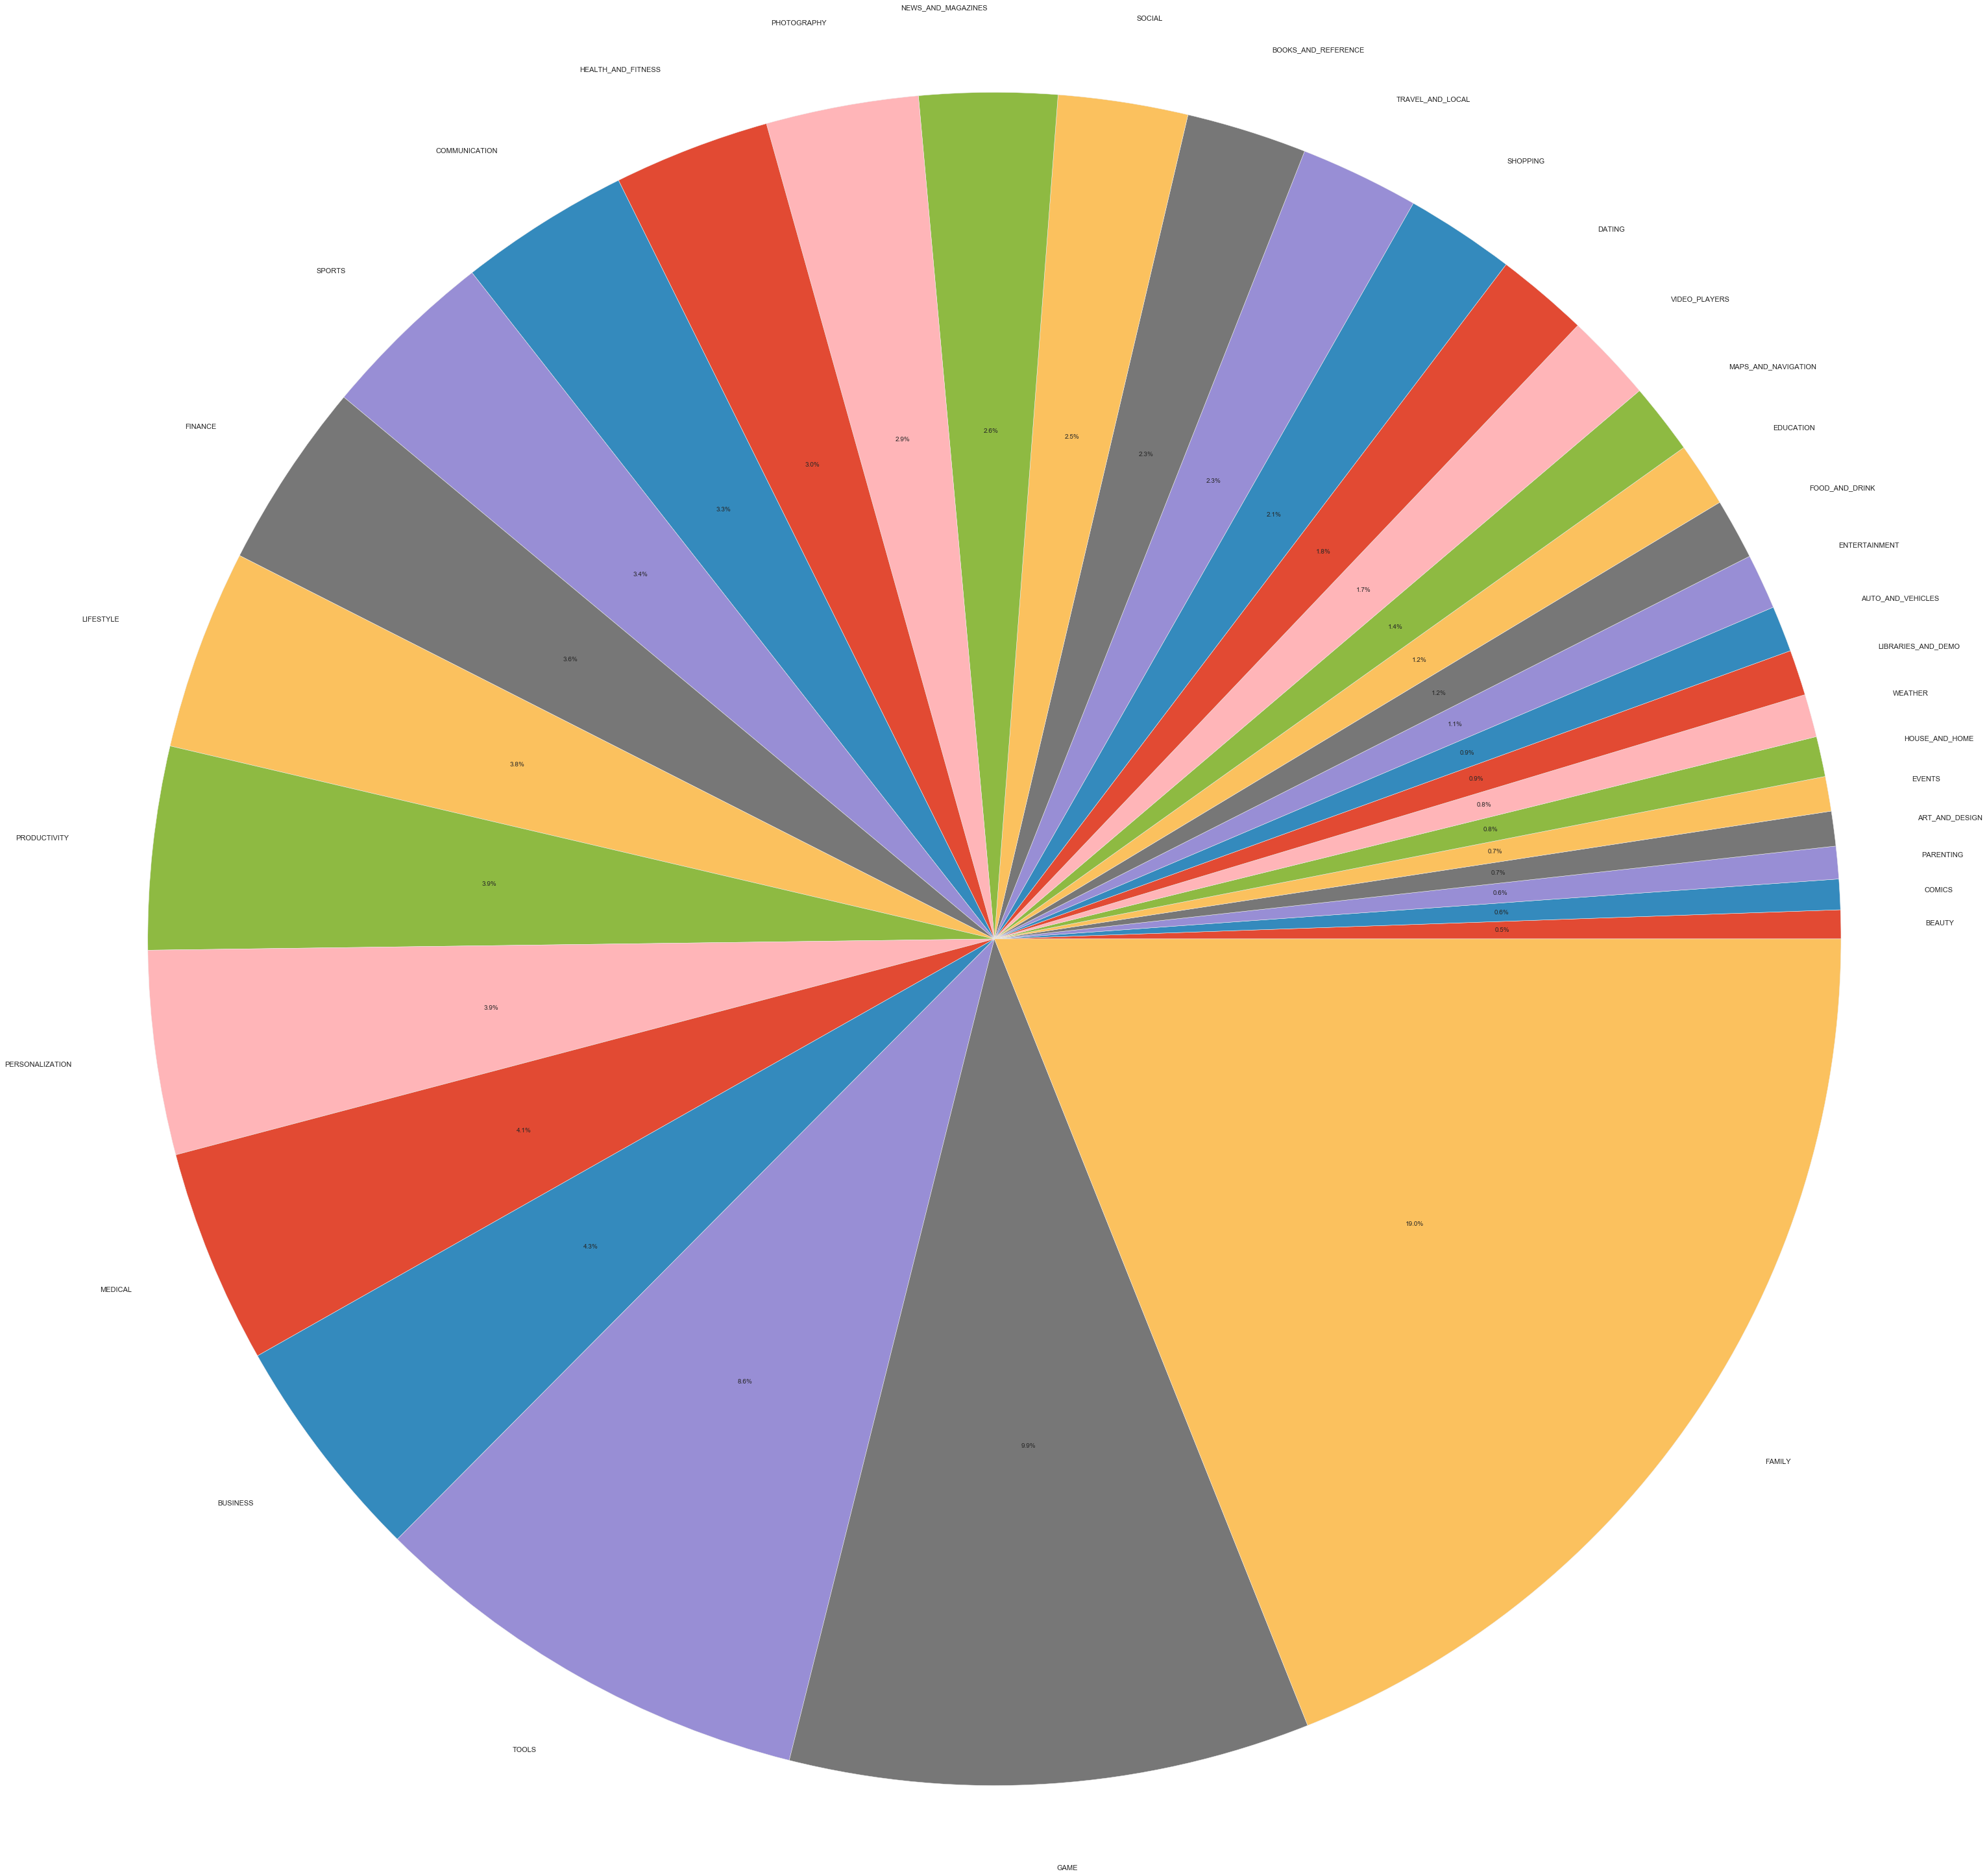

In [79]:

number_of_apps_in_category = gd['Category'].value_counts().sort_values(ascending=True)


plt.pie(x = number_of_apps_in_category.values, 
        labels = number_of_apps_in_category.index, 
        radius = 4, autopct='%1.1f%%'
        )


([<matplotlib.patches.Wedge at 0x1a1bca85f8>,
 [Text(4.399986183302243, 0.011026638171551362, 'Catalogs'),
  Text(4.399502607991854, 0.06615740527619002, 'Medical'),
  Text(4.396374441936795, 0.17858265953034488, 'Navigation'),
  Text(4.385143804239611, 0.36126695965580863, 'Food & Drink'),
  Text(4.360068921975563, 0.5914380742079927, 'Business'),
  Text(4.322509563718798, 0.8221381097841969, 'Reference'),
  Text(4.269040231565712, 1.0655024642267954, 'News'),
  Text(4.193952975125575, 1.330698479158723, 'Book'),
  Text(4.097606874561272, 1.6030027765254191, 'Weather'),
  Text(3.977965296598087, 1.8803702026625762, 'Travel'),
  Text(3.8341776716131952, 2.158490579665062, 'Finance'),
  Text(3.6340894120109932, 2.4806035849183155, 'Sports'),
  Text(3.357644883787428, 2.8436281111242576, 'Shopping'),
  Text(3.0259327908076328, 3.1943279020030384, 'Lifestyle'),
  Text(2.6083284417841086, 3.543532522749027, 'Social Networking'),
  Text(2.110278994670017, 3.860922501767486, 'Music'),
  Text

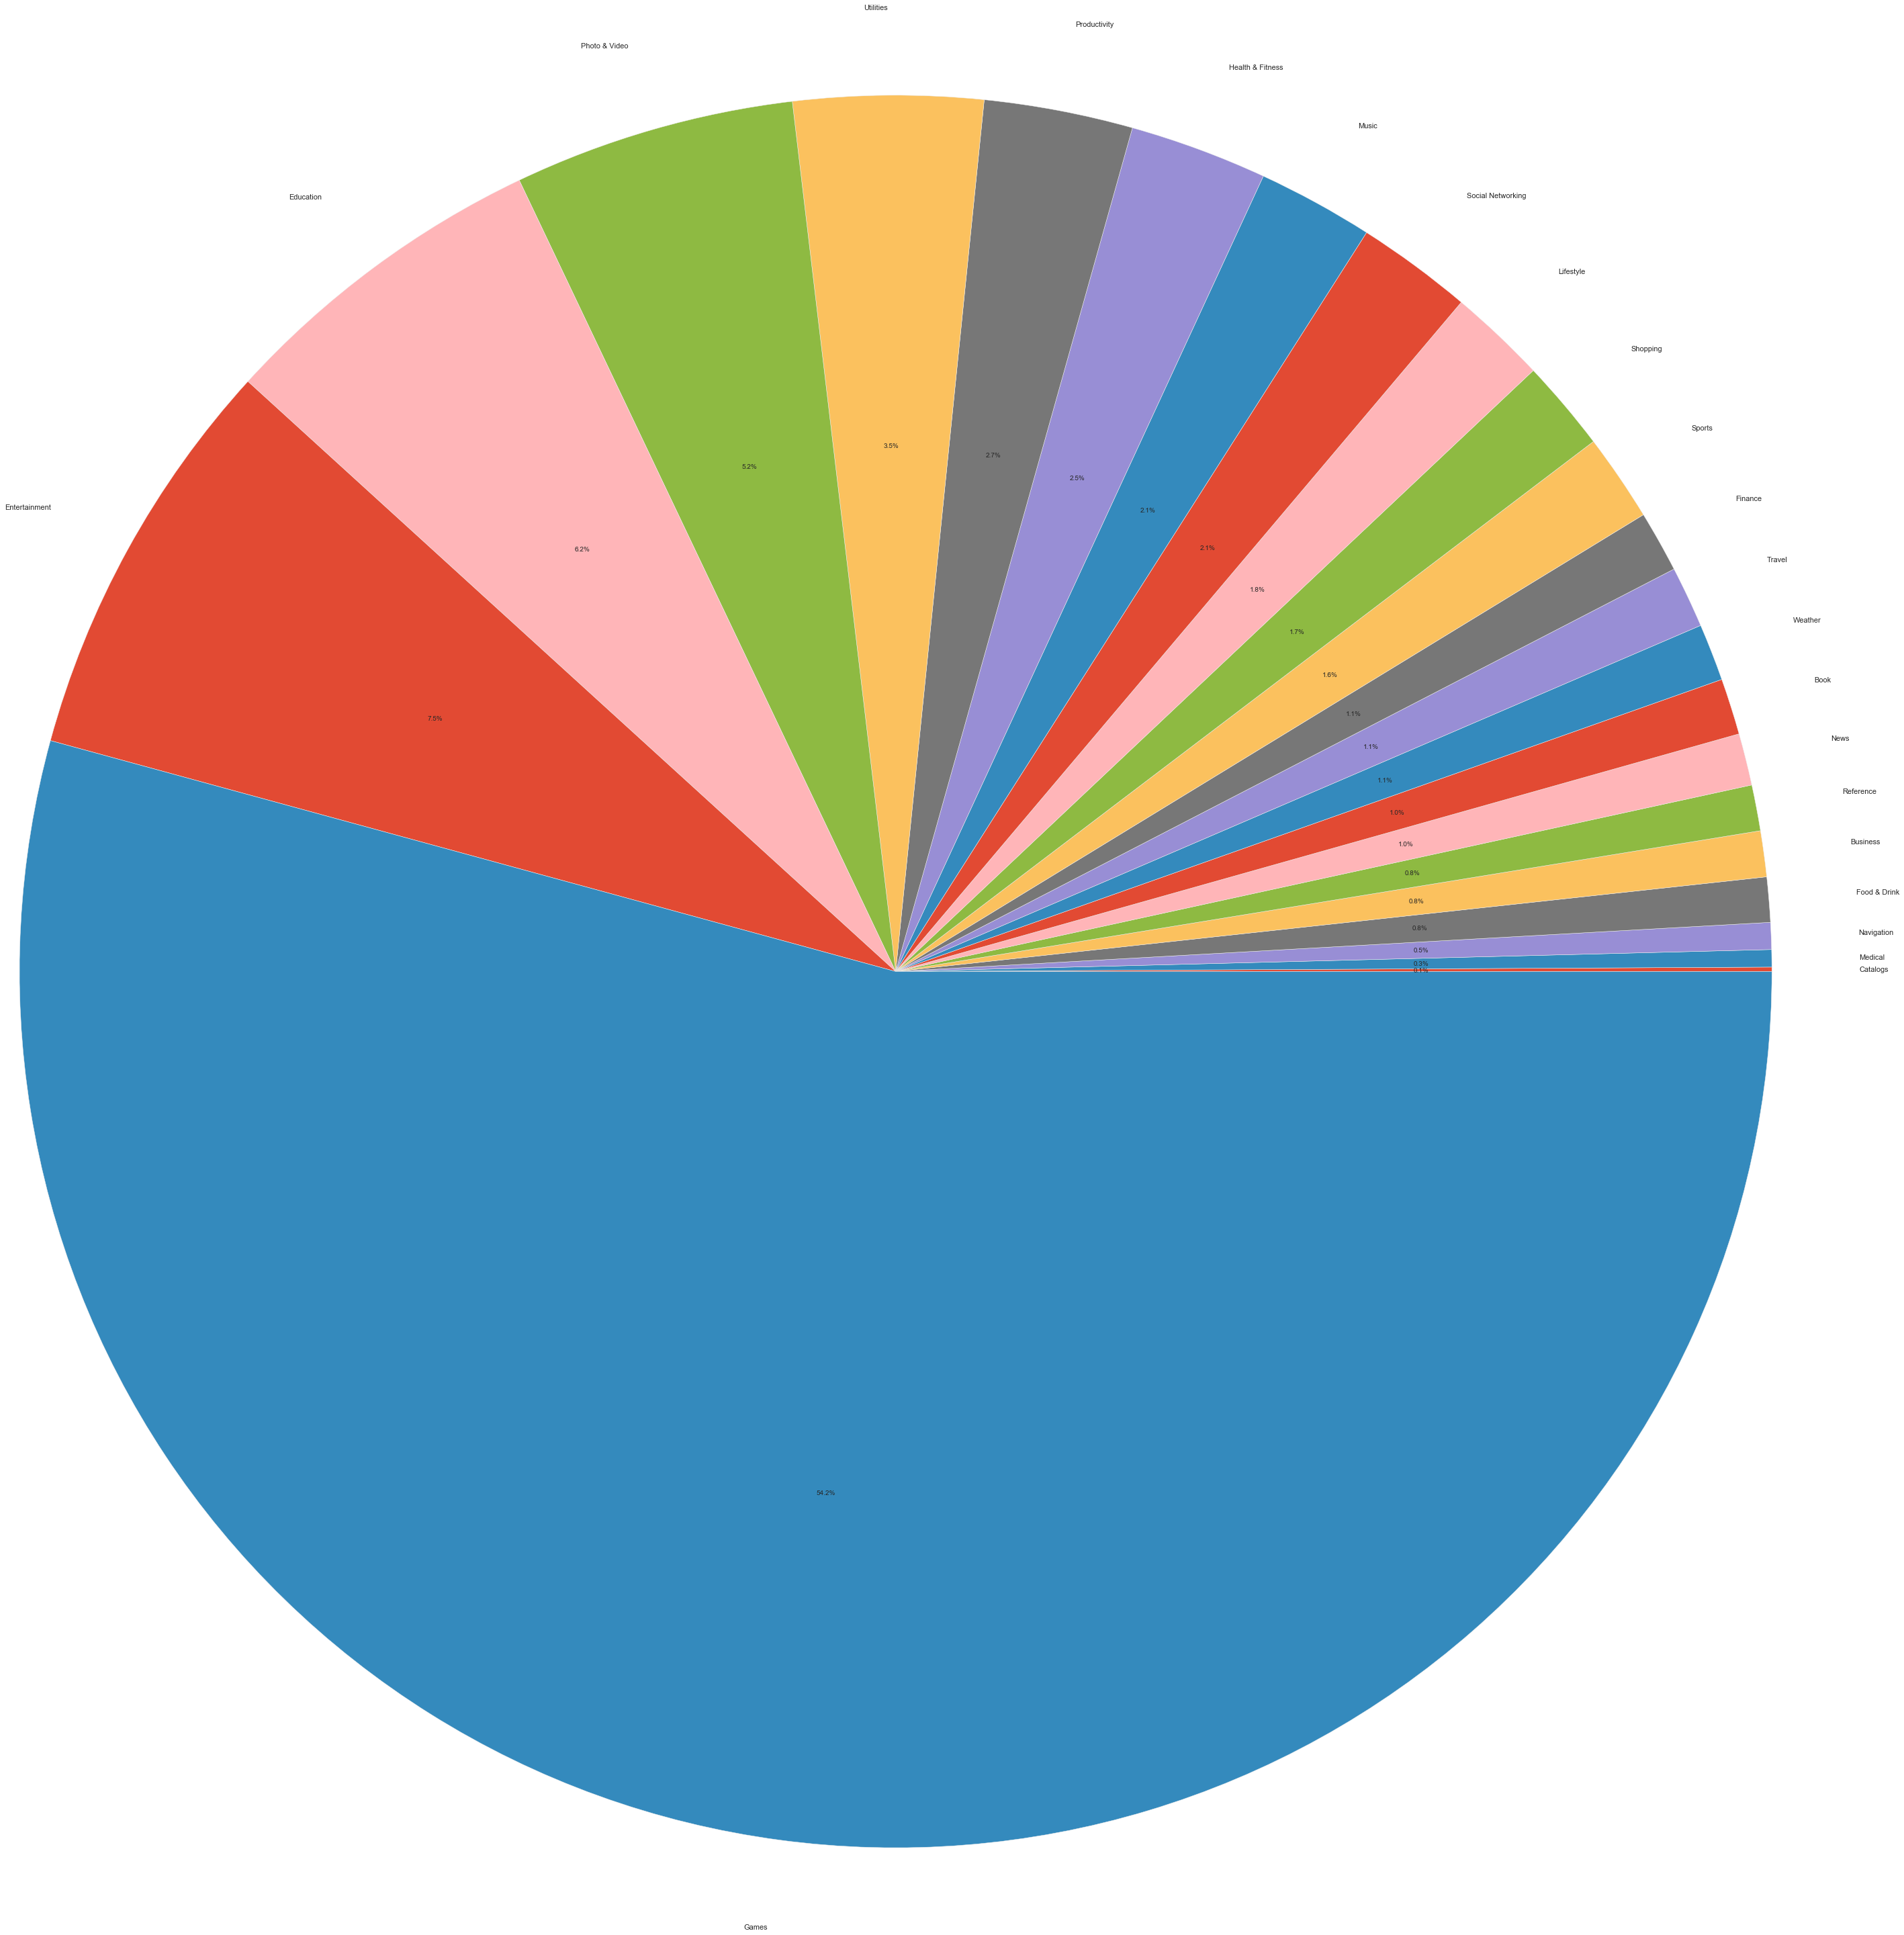

In [80]:
number_of_apps_in_category = ad['prime_genre'].value_counts().sort_values(ascending=True)


plt.pie(x = number_of_apps_in_category.values, 
        labels = number_of_apps_in_category.index, 
        radius = 4, autopct='%1.1f%%'
        )

From the pie chart above, I know Family is the biggest category followed by Game and Tools. 
Then, I want to know what the general rating situation is

In [81]:
gd['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

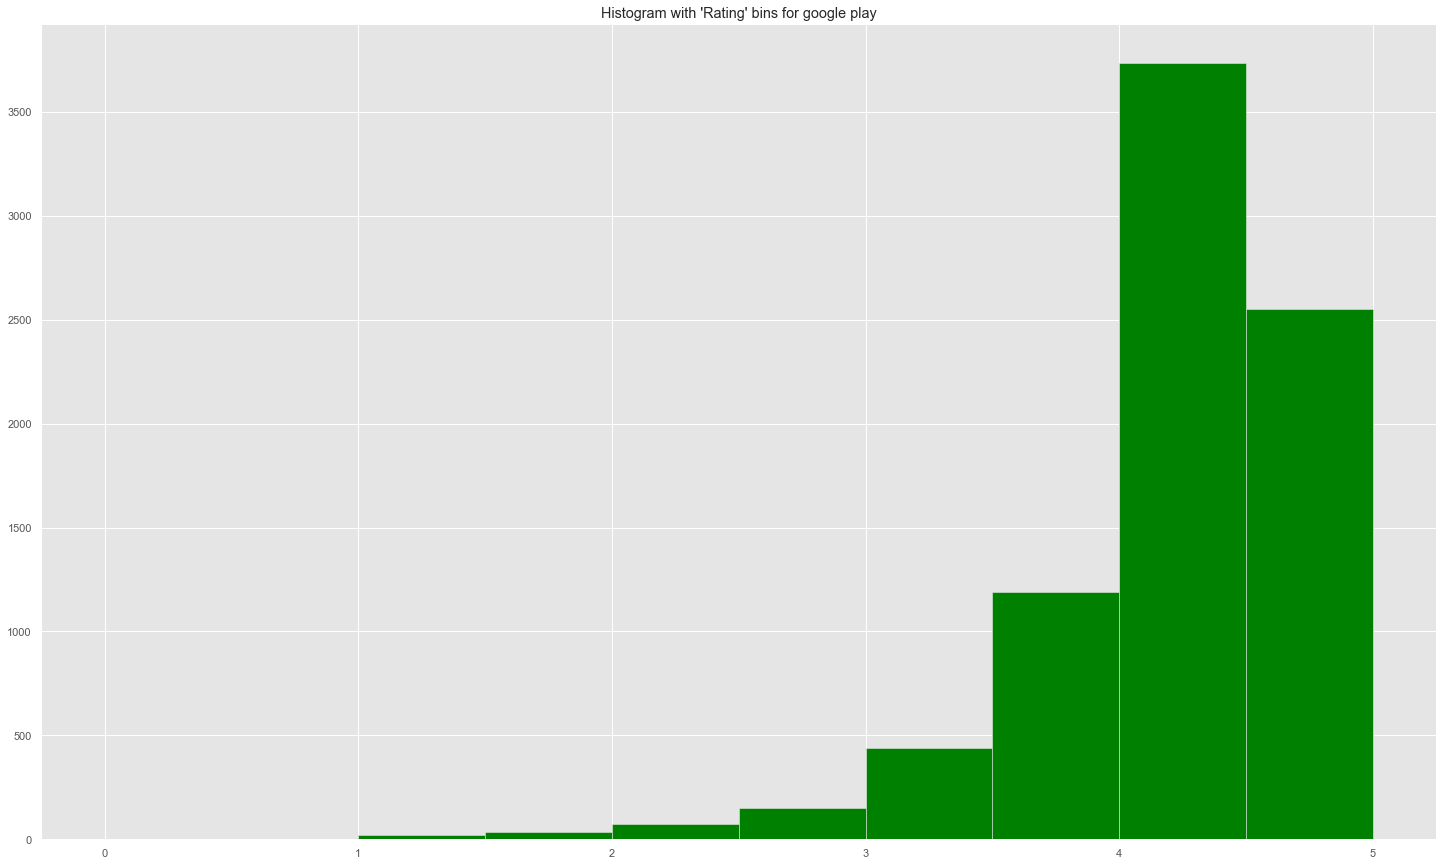

In [82]:
# g = sns.kdeplot(gd.Rating, color="Green", shade = True)
# g.set_xlabel("Rating")
# g.set_ylabel("Frequency")
# plt.title('Distribution of Rating',size = 15)

plt.hist(gd.Rating, bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4,4.5,5], color = 'green')  # arguments are passed to np.histogram
plt.title("Histogram with 'Rating' bins for google play")
plt.show()

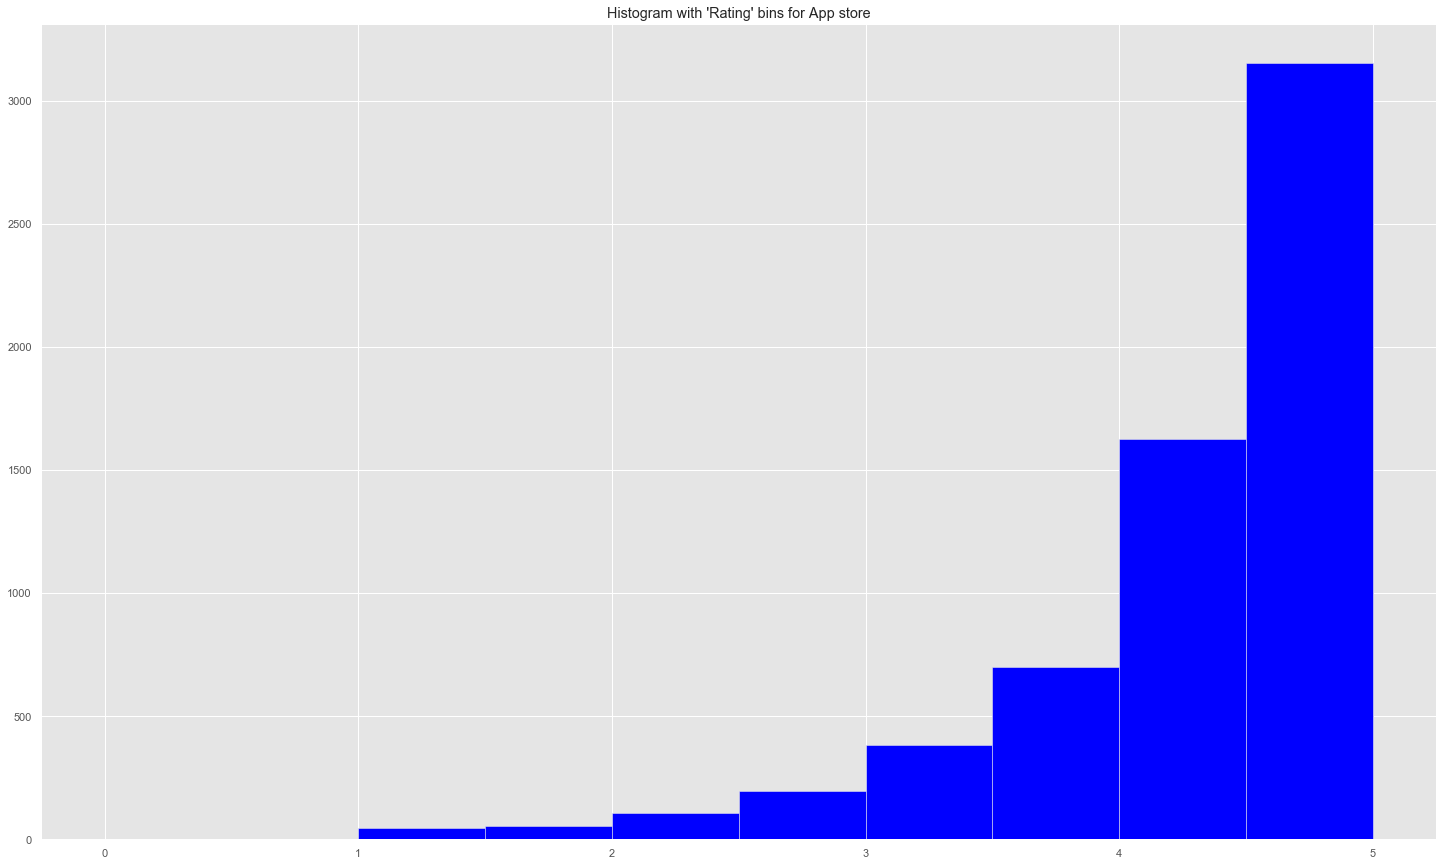

In [83]:
plt.hist(ad.user_rating, bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4,4.5,5], color = 'Blue')  # arguments are passed to np.histogram
plt.title("Histogram with 'Rating' bins for App store")
plt.show()

Distribute them into different categories

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

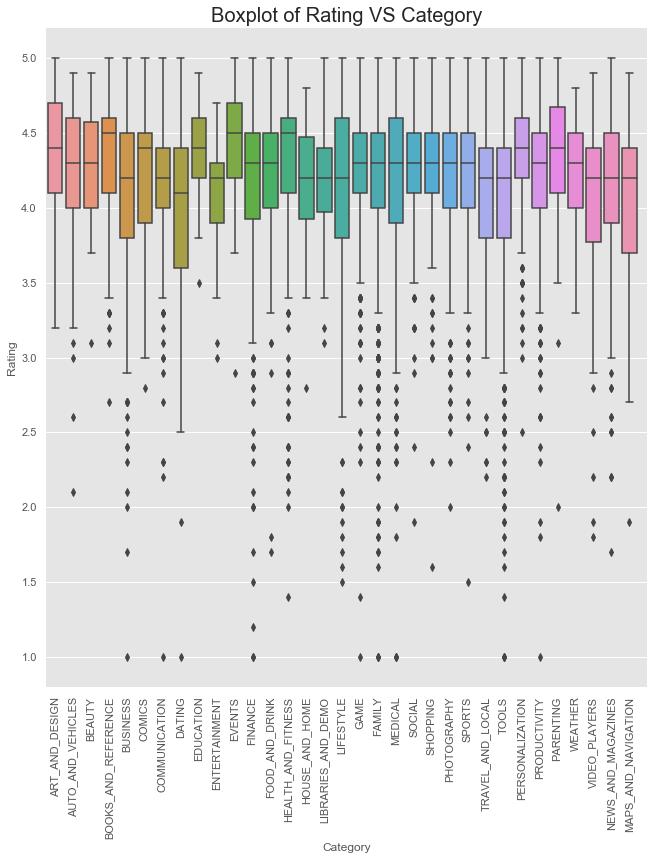

In [84]:
g = sns.catplot(x="Category",y="Rating",data=gd, kind="box", height = 10)
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

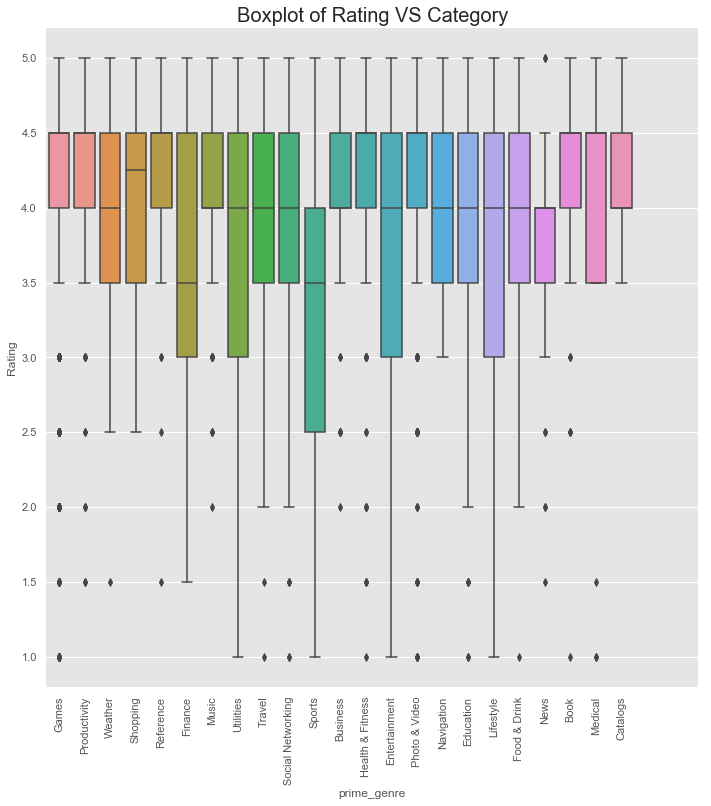

In [85]:
g = sns.catplot(x="prime_genre",y="user_rating",data=ad, kind="box", height = 10)
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,26))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

Then, I want to know the correlation between size and the rating

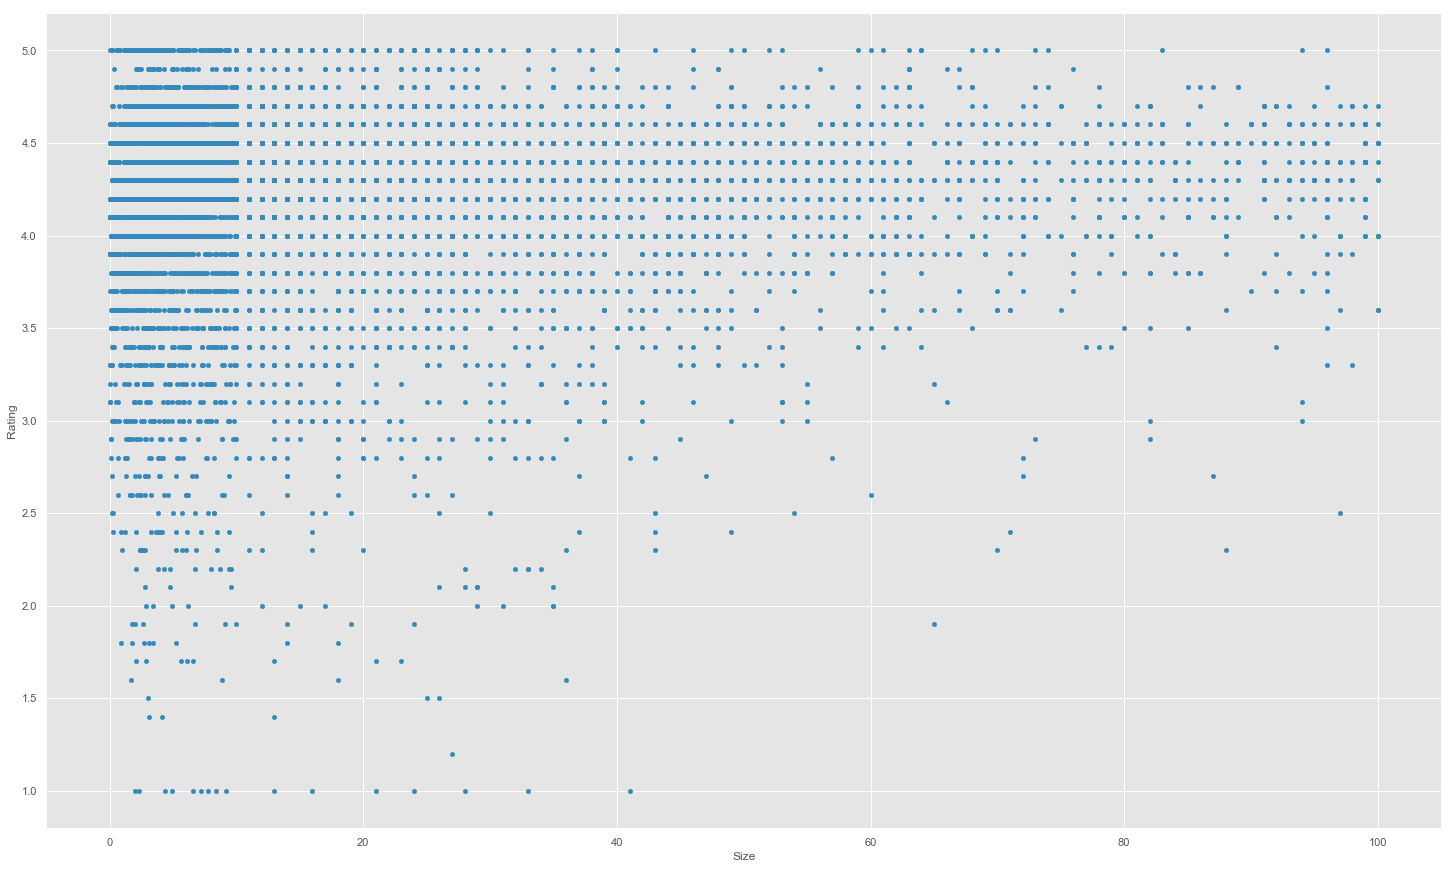

In [86]:
gd.plot.scatter('Size', 'Rating')

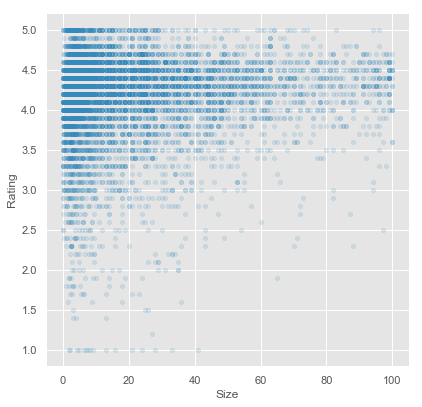

In [87]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
gd.plot.scatter('Size', 'Rating', alpha=0.15,ax=ax)

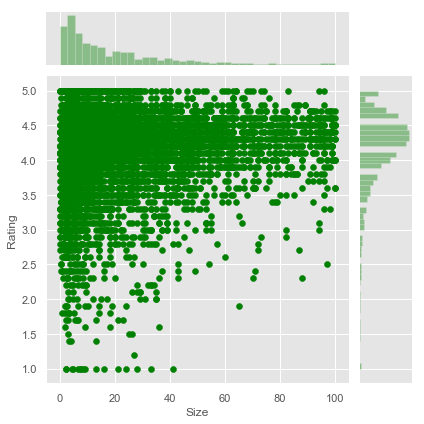

In [88]:

sns.jointplot(data=gd, y='Rating', x='Size', color='green')

Looks like most highly rated apps is around 2-40 MB

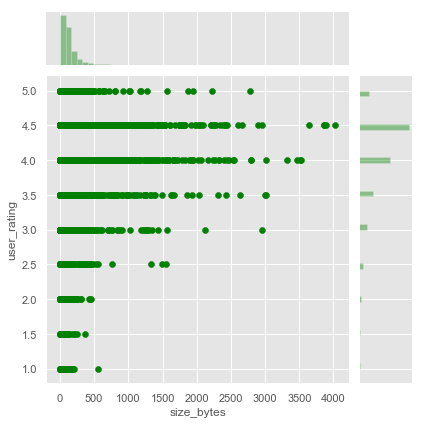

In [89]:

sns.jointplot(data=ad, y='user_rating', x='size_bytes', color='green')

Looks like most of the apps are in the range of (0-500M) let's zoom it in to see more clearly

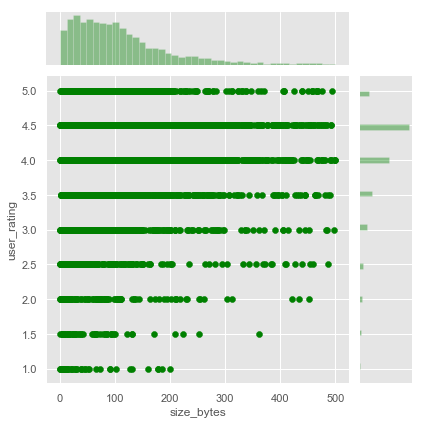

In [90]:
ad2 = ad[ad['size_bytes']<500]
sns.jointplot(data=ad2, y='user_rating', x='size_bytes', color='green')

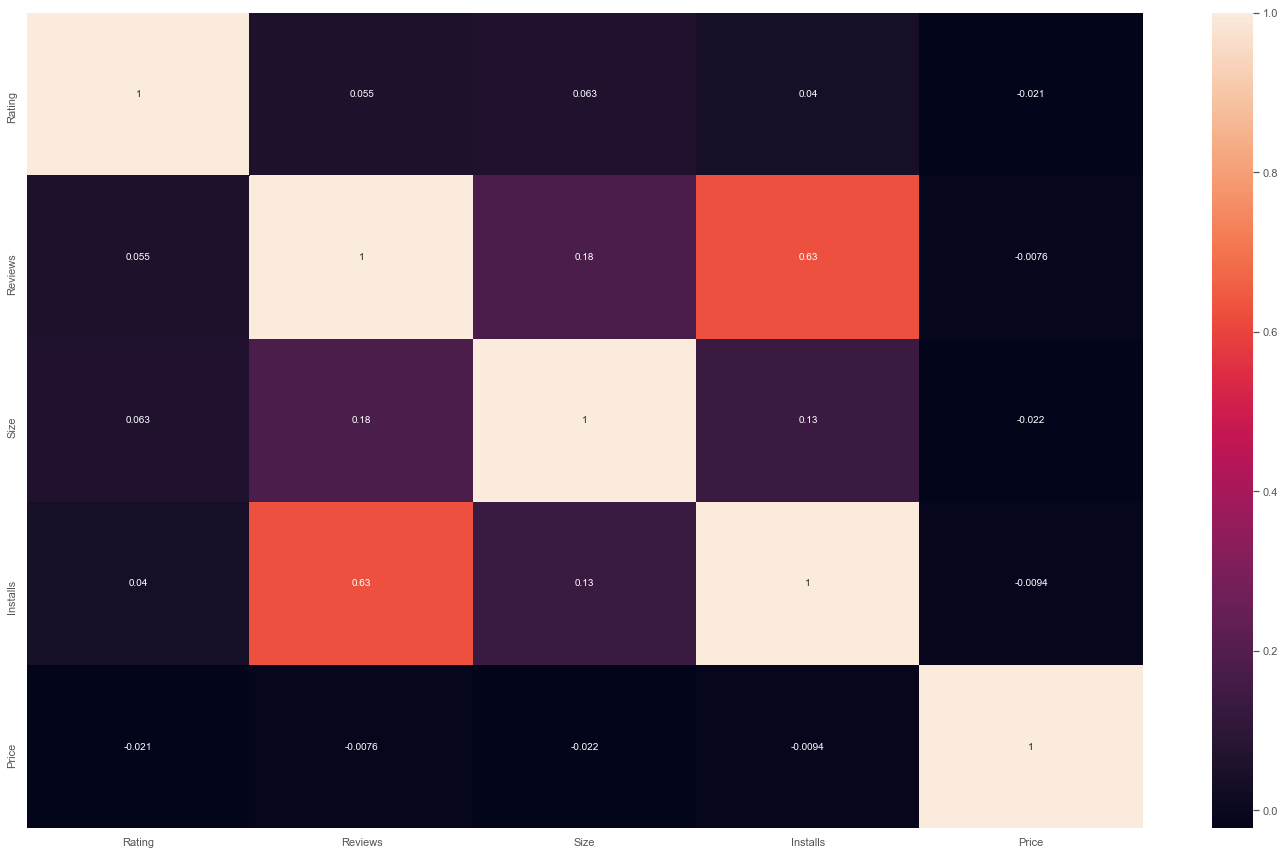

In [91]:
#df['Installs'].corr(df['Reviews'])#df['Insta 
#print(np.corrcoef(l, rating))

corrmat = gd.corr()
#f, ax = plt.subplots()
p =sns.heatmap(corrmat, annot=True)

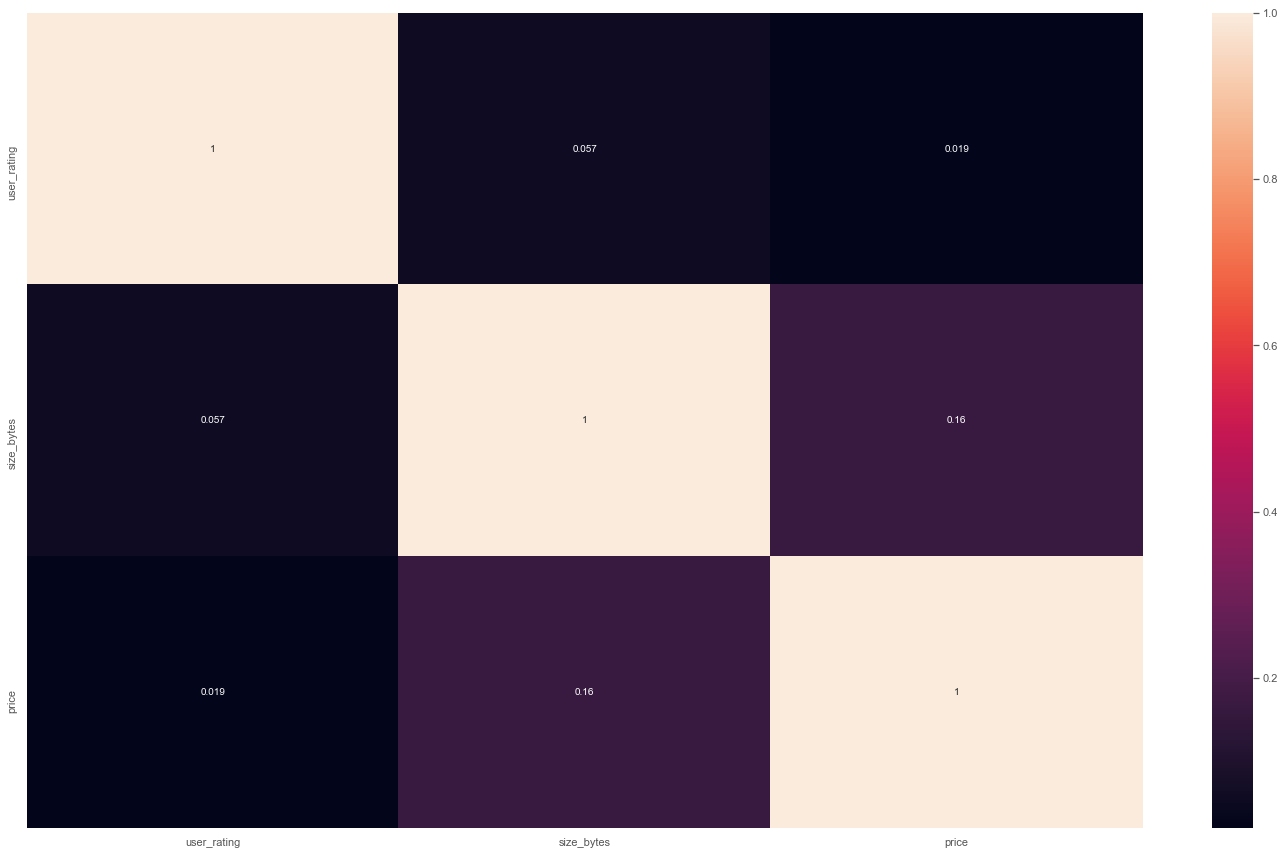

In [92]:
ad1 = pd.DataFrame(data=(ad.user_rating, ad.size_bytes, ad.price)).T
corrmat = ad1.corr()
#f, ax = plt.subplots()
p =sns.heatmap(corrmat, annot=True)